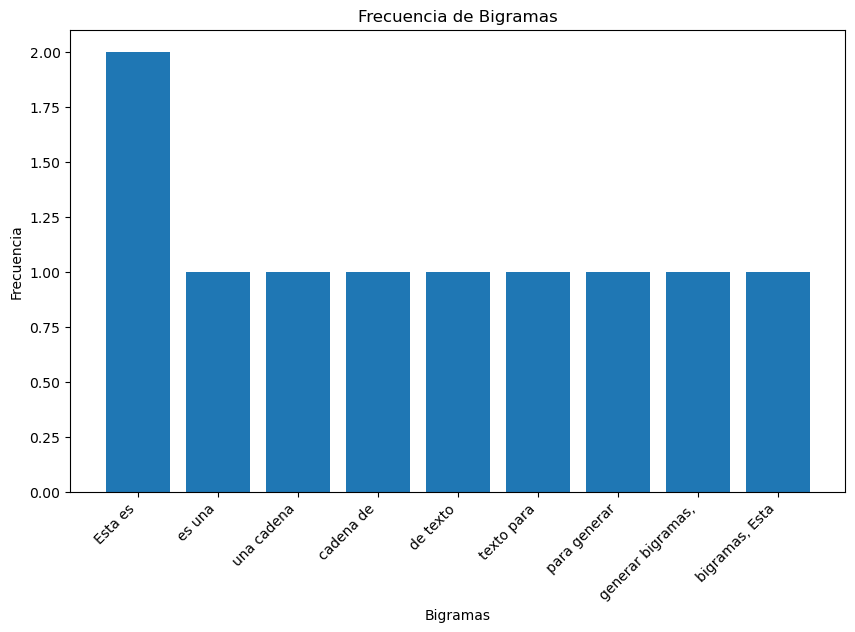

In [4]:
import matplotlib.pyplot as plt
from collections import Counter

def generar_bigramas(texto):
    palabras = texto.split()
    bigramas = [(palabras[i], palabras[i + 1]) for i in range(len(palabras) - 1)]
    return bigramas

texto = "Esta es una cadena de texto para generar bigramas, Esta es "
bigramas = generar_bigramas(texto)

# Conteo de bigramas
conteo_bigramas = Counter(bigramas)

# Obtener datos para el gráfico
bigramas_unicos = list(conteo_bigramas.keys())
frecuencias = list(conteo_bigramas.values())

# Graficar
plt.figure(figsize=(10, 6))
plt.bar(range(len(bigramas_unicos)), frecuencias, tick_label=[f"{bigrama[0]} {bigrama[1]}" for bigrama in bigramas_unicos])
plt.xticks(rotation=45, ha='right')
plt.xlabel('Bigramas')
plt.ylabel('Frecuencia')
plt.title('Frecuencia de Bigramas')
plt.show()




In [10]:
frecuencias

[2, 1, 1, 1, 1, 1, 1, 1, 1]

In [9]:
re.sub(r'[^\w\s]', '', "texto con signos de puntuación;")

'texto con signos de puntuación'

In [12]:
cadena1 = "Hola:"
print(cadena1.isalpha())  # Devuelve True, ya que todos los caracteres son letras alfabéticas.

cadena2 = "Hola123"
print(cadena2.isalpha())  # Devuelve False, ya que la cadena contiene caracteres que no son letras alfabéticas.

cadena3 = "123"
print(cadena3.isalpha())  # Devuelve False, ya que la cadena está vacía.


False
False
False


In [2]:
def procesar_texto(input_file):
    # Leer el texto del archivo
    with open(input_file, 'r') as file:
        texto = file.read()

    # Separar las palabras y eliminar duplicados
    palabras = texto.split('\n')
    palabras_sin_duplicados = list(set(palabras))
    # Reconstruir el texto sin duplicados
    nuevo_texto = '\n'.join(palabras_sin_duplicados)

    # Escribir el nuevo texto en el mismo archivo
    with open(input_file, 'w') as file:
        file.write(nuevo_texto)

# Ruta del archivo de entrada
archivo_input = '../input/stop_words_taller4.txt'

# Llamar a la función para procesar el texto
procesar_texto(archivo_input)

694
425


In [10]:
import plotly.graph_objects as go
from wordcloud import WordCloud
from collections import Counter

def plot_wordcloud(text, max_words=10):
    # Genera un contador de las palabras en el texto
    word_counts = Counter(text.split())

    # Obtiene las 'max_words' palabras más comunes
    most_common_words = dict(word_counts.most_common(max_words))

    # Genera la nube de palabras
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(most_common_words)

    # Crea la figura de Plotly
    fig = go.Figure()

    # Añade la nube de palabras como una imagen a la figura
    fig.add_layout_image(
        x=0, y=1, 
        xref="paper", yref="paper",
        sizex=1, sizey=1, 
        opacity=1.0, 
        layer="below",
        source=wordcloud.to_image()
    )

    # Configura el diseño de la figura
    fig.update_xaxes(visible=False, range=[0,1])
    fig.update_yaxes(visible=False, range=[0,1])
    fig.update_layout(width=800, height=400, margin=dict(l=0, r=0, b=0, t=0))

    # Muestra la figura
    fig.show()

# Ejemplo de uso
texto = "python python plotly plotly plotly wordcloud wordcloud wordcloud"
plot_wordcloud(texto, max_words=10)


In [9]:
wordcloud

TypeError: 'WordCloud' object is not iterable

In [12]:
import nltk
from nltk.corpus import movie_reviews
from nltk.tokenize import word_tokenize
from nltk.classify import NaiveBayesClassifier

# Obtener las opiniones de películas con sus categorías
documents = [(list(movie_reviews.words(fileid)), category)
             for category in movie_reviews.categories()
             for fileid in movie_reviews.fileids(category)]

# Mezclar los documentos para que las opiniones estén aleatoriamente ordenadas
import random
random.shuffle(documents)

# Extraer las palabras características de los documentos
all_words = nltk.FreqDist(w.lower() for w in movie_reviews.words())
word_features = list(all_words)[:2000]

# Definir una función para determinar las características de un documento
def document_features(document):
    document_words = set(document)
    features = {}
    for word in word_features:
        features['contains({})'.format(word)] = (word in document_words)
    return features

# Crear el conjunto de datos de características y entrenar el clasificador
featuresets = [(document_features(d), c) for (d,c) in documents]
train_set, test_set = featuresets[100:], featuresets[:100]
classifier = nltk.NaiveBayesClassifier.train(train_set)

# Evaluar el clasificador
print("Accuracy:", nltk.classify.accuracy(classifier, test_set))

# Ejemplo de uso del clasificador
example_review = "This movie is fantastic!"
words = word_tokenize(example_review)
features = document_features(words)
print("Sentiment:", classifier.classify(features))


LookupError: 
**********************************************************************
  Resource [93mmovie_reviews[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('movie_reviews')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mcorpora/movie_reviews[0m

  Searched in:
    - 'C:\\Users\\bcriv/nltk_data'
    - 'c:\\Users\\bcriv\\miniconda3\\envs\\redes_sociales\\nltk_data'
    - 'c:\\Users\\bcriv\\miniconda3\\envs\\redes_sociales\\share\\nltk_data'
    - 'c:\\Users\\bcriv\\miniconda3\\envs\\redes_sociales\\lib\\nltk_data'
    - 'C:\\Users\\bcriv\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
**********************************************************************


In [1]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.collocations import BigramCollocationFinder
from nltk.metrics import BigramAssocMeasures

# Descargar los recursos necesarios
nltk.download('punkt')

# Texto de ejemplo
texto = "NLTK es una biblioteca popular de Python para procesamiento de texto. Puede ser usada para tareas como tokenización, etiquetado POS, y extracción de bigramas."

# Tokenización de palabras
palabras = word_tokenize(texto)

# Crear bigramas
finder = BigramCollocationFinder.from_words(palabras)

# Calcular la frecuencia de los bigramas
bigramas_frecuencia = finder.ngram_fd.items()

# Ordenar los bigramas por frecuencia
bigramas_frecuencia_ordenados = sorted(bigramas_frecuencia, key=lambda item: item[1], reverse=True)

# Mostrar los bigramas más frecuentes
for bigrama, frecuencia in bigramas_frecuencia_ordenados:
    print(bigrama, frecuencia)


('NLTK', 'es') 1
('es', 'una') 1
('una', 'biblioteca') 1
('biblioteca', 'popular') 1
('popular', 'de') 1
('de', 'Python') 1
('Python', 'para') 1
('para', 'procesamiento') 1
('procesamiento', 'de') 1
('de', 'texto') 1
('texto', '.') 1
('.', 'Puede') 1
('Puede', 'ser') 1
('ser', 'usada') 1
('usada', 'para') 1
('para', 'tareas') 1
('tareas', 'como') 1
('como', 'tokenización') 1
('tokenización', ',') 1
(',', 'etiquetado') 1
('etiquetado', 'POS') 1
('POS', ',') 1
(',', 'y') 1
('y', 'extracción') 1
('extracción', 'de') 1
('de', 'bigramas') 1
('bigramas', '.') 1


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\bcriv\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [3]:
import nltk
from itertools import combinations

def generate_skipgrams(text, n, k):
    """
    Generate skipgrams from a given text.

    Parameters:
    text (str): Input text.
    n (int): Size of the n-grams.
    k (int): Number of skips allowed.

    Returns:
    list: List of skipgrams.
    """
    # Tokenize words
    words = nltk.word_tokenize(text)
    
    # Initialize list to store skipgrams
    skipgrams_list = []
    
    # Generate skipgrams
    for i in range(len(words)):
        # Create combinations of words with skips
        skipgrams = combinations(words[i:i+n+k], n)
        skipgrams_list.extend(skipgrams)
    
    return skipgrams_list

# Example usage:
text = "NLTK is a popular Python library for text processing. It can be used for tasks such as tokenization, POS tagging, and extracting skipgrams."
skipgrams = generate_skipgrams(text, 2, 0)
print(skipgrams)


[('NLTK', 'is'), ('is', 'a'), ('a', 'popular'), ('popular', 'Python'), ('Python', 'library'), ('library', 'for'), ('for', 'text'), ('text', 'processing'), ('processing', '.'), ('.', 'It'), ('It', 'can'), ('can', 'be'), ('be', 'used'), ('used', 'for'), ('for', 'tasks'), ('tasks', 'such'), ('such', 'as'), ('as', 'tokenization'), ('tokenization', ','), (',', 'POS'), ('POS', 'tagging'), ('tagging', ','), (',', 'and'), ('and', 'extracting'), ('extracting', 'skipgrams'), ('skipgrams', '.')]


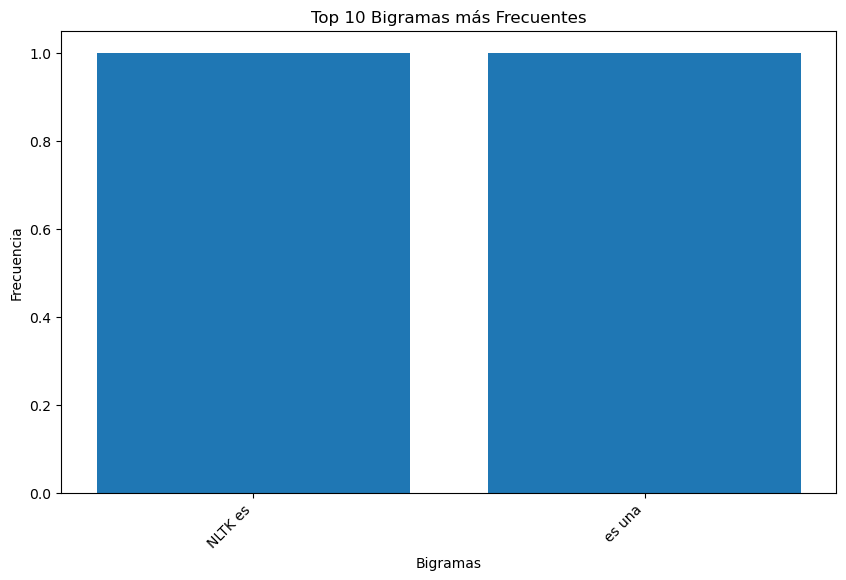

In [6]:
import matplotlib.pyplot as plt
from collections import Counter

def plot_bigramas(skipgramas,top_n=10):
    # Conteo de bigramas
    conteo_bigramas = Counter(skipgramas)

    # Obtener los 10 bigramas más frecuentes
    bigramas_mas_frecuentes = conteo_bigramas.most_common(top_n)

    # Obtener datos para el gráfico
    bigramas_unicos = [bigrama[0] for bigrama in bigramas_mas_frecuentes]
    frecuencias = [frecuencia for _, frecuencia in bigramas_mas_frecuentes]

    # Graficar
    plt.figure(figsize=(10, 6))
    plt.bar(range(len(bigramas_unicos)), frecuencias, tick_label=[f"{bigrama[0]} {bigrama[1]}" for bigrama in bigramas_unicos])
    plt.xticks(rotation=45, ha='right')
    plt.xlabel('Bigramas')
    plt.ylabel('Frecuencia')
    plt.title('Top 10 Bigramas más Frecuentes')
    plt.show()

# Ejemplo de uso:
plot_bigramas(skipgramas,2)


In [15]:
from collections import Counter

def filtrar_bigramas_por_frecuencia(bigramas, umbral):
    # Contar la frecuencia de cada bigrama
    conteo_bigramas = Counter(bigramas)
    
    # Filtrar los bigramas que superan el umbral de frecuencia
    bigramas_filtrados = [(bigrama, frecuencia) for bigrama, frecuencia in conteo_bigramas.items() if frecuencia > umbral]
    
    return bigramas_filtrados

# Ejemplo de uso
lista_de_bigramas = [('el', 'perro'), ('perro', 'come'), ('come', 'comida'), ('el', 'gato'), ('gato', 'come'), ('gato', 'come')]
umbral = 1
bigramas_filtrados = filtrar_bigramas_por_frecuencia(lista_de_bigramas, umbral)
print("Bigramas que superan el umbral de frecuencia:")
for bigrama, frecuencia in bigramas_filtrados:
    print(f"Bigrama: {bigrama}, Frecuencia: {frecuencia}")



Bigramas que superan el umbral de frecuencia:
Bigrama: ('gato', 'come'), Frecuencia: 2


In [6]:
import networkx as nx
import plotly.graph_objects as go

# Lista de aristas con atributos adicionales
aristas = [
    ('A', 'B', {'peso': 5}),
    ('B', 'C', {'peso': 7}),
    ('C', 'D', {'peso': 3}),
    ('D', 'E', {'peso': 8}),
    ('E', 'A', {'peso': 2}),
    ('A', 'C', {'peso': 4}),
]

# Crea un grafo vacío
G = nx.Graph()

# Agrega las aristas al grafo junto con sus atributos
G.add_edges_from(aristas)

# Define el layout del grafo
pos = nx.kamada_kawai_layout(G)

# Crea los nodos y aristas para Plotly
edge_trace = go.Scatter(
    x=[],
    y=[],
    line=dict(width=0.5, color='#888'),
    hoverinfo='none',
    mode='lines')

for edge in G.edges():
    x0, y0 = pos[edge[0]]
    x1, y1 = pos[edge[1]]
    edge_trace['x'] += tuple([x0, x1, None])
    edge_trace['y'] += tuple([y0, y1, None])

node_trace = go.Scatter(
    x=[],
    y=[],
    text=[],
    mode='markers',
    hoverinfo='text',
    marker=dict(
        showscale=True,
        colorscale='YlGnBu',
        reversescale=True,
        color=[],
        size=10,
        colorbar=dict(
            thickness=15,
            title='Node Connections',
            xanchor='left',
            titleside='right'
        ),
        line_width=2))

for node in G.nodes():
    x, y = pos[node]
    node_trace['x'] += tuple([x])
    node_trace['y'] += tuple([y])

# Adiciona el número de conexiones a cada nodo como texto
for node, adjacencies in enumerate(G.adjacency()):
    node_trace['marker']['color'] += tuple([len(adjacencies[1])])
    node_info = f'{adjacencies[0]}<br># Conexiones: {len(adjacencies[1])}'
    node_trace['text'] += tuple([node_info])

# Crea la figura y plotea
fig = go.Figure(data=[edge_trace, node_trace],
                layout=go.Layout(
                    title='<br>Gráfico de red con Plotly',
                    titlefont_size=16,
                    showlegend=False,
                    hovermode='closest',
                    margin=dict(b=20, l=5, r=5, t=40),
                    annotations=[dict(
                        text="Python",
                        showarrow=False,
                        xref="paper", yref="paper",
                        x=0.005, y=-0.002)],
                    xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
                    yaxis=dict(showgrid=False, zeroline=False, showticklabels=False))
                )

fig.show()


In [1]:
from transformers import pipeline

distilled_student_sentiment_classifier = pipeline(
    model="lxyuan/distilbert-base-multilingual-cased-sentiments-student", 
    return_all_scores=True
)

ImportError: cannot import name 'pipeline' from 'transformers' (c:\Users\bcriv\miniconda3\envs\redes_sociales\Lib\site-packages\transformers\__init__.py)

In [2]:
x=distilled_student_sentiment_classifier('mundo', 'hola')
x

NameError: name 'distilled_student_sentiment_classifier' is not defined

In [52]:
from collections import defaultdict

def contar_tuplas(tuplas, frecuencia_minima):
    # Creamos un diccionario para contar las frecuencias de las tuplas
    contador = defaultdict(int)
    
    # Contamos las frecuencias de las tuplas
    for tupla in tuplas:
        # Ordenamos la tupla para que ('hola', 'mundo') y ('mundo', 'hola') sean consideradas iguales
        tupla_ordenada = tuple(sorted(tupla))
        contador[tupla_ordenada] += 1
    
    # Filtramos las tuplas que superen cierta frecuencia mínima
    tuplas_seleccionadas = [tupla for tupla, frecuencia in contador.items() if frecuencia >= frecuencia_minima]
    
    return tuplas_seleccionadas

# Ejemplo de uso
lista_tuplas = [('hola', 'mundo'), ('mundo', 'hola'), ('hola', 'amigo'), ('adios', 'mundo'), ('hola', 'mundo')]
frecuencia_minima = 3

tuplas_seleccionadas = contar_tuplas(lista_tuplas, frecuencia_minima)
print("Tuplas con una frecuencia mayor o igual a", frecuencia_minima, ":", tuplas_seleccionadas)


Tuplas con una frecuencia mayor o igual a 3 : [('hola', 'mundo')]


In [53]:
def ordenar_tuplas(lista_tuplas):
    # Utilizamos comprensión de listas para ordenar cada tupla y formar la nueva lista
    return [tuple(sorted(tupla)) for tupla in lista_tuplas]

# Ejemplo de uso
lista_de_tuplas = [('b', 'c', 'a'), ('z', 'x', 'y'), ('f', 'd', 'e')]
tuplas_ordenadas = ordenar_tuplas(lista_de_tuplas)
print(tuplas_ordenadas)


[('a', 'b', 'c'), ('x', 'y', 'z'), ('d', 'e', 'f')]


In [60]:
import igraph as ig
from plotly.offline import plot
import plotly.graph_objs as go

# Crear un grafo con igraph
g = ig.Graph.Famous('petersen')

# Obtener los grados de los nodos
node_degrees = g.degree()

# Obtener las posiciones de los nodos utilizando el algoritmo de Fruchterman-Reingold
layout = g.layout_fruchterman_reingold()

# Obtener las aristas y los nodos
edge_x = []
edge_y = []
for edge in g.get_edgelist():
    x0, y0 = layout[edge[0]]
    x1, y1 = layout[edge[1]]
    edge_x.extend([x0, x1, None])
    edge_y.extend([y0, y1, None])

node_x = [pos[0] for pos in layout]
node_y = [pos[1] for pos in layout]

# Crear los trazos para los nodos y aristas
edge_trace = go.Scatter(
    x=edge_x,
    y=edge_y,
    line=dict(width=0.5,color='#888'),
    hoverinfo='none',
    mode='lines')

node_trace = go.Scatter(
    x=node_x,
    y=node_y,
    text=[str(node) for node in range(len(layout))],
    mode='markers',
    hoverinfo='text',
    marker=dict(
        showscale=True,
        colorscale='YlGnBu',
        reversescale=True,
        color=node_degrees,
        size=10,
        colorbar=dict(
            thickness=15,
            title='Node Connections',
            xanchor='left',
            titleside='right'
        ),
        line=dict(width=2)))

# Crear el gráfico
fig = go.Figure(data=[edge_trace, node_trace],
             layout=go.Layout(
                title='Grafo de igraph con Plotly',
                titlefont=dict(size=16),
                showlegend=False,
                hovermode='closest',
                margin=dict(b=20,l=5,r=5,t=40),
                annotations=[ dict(
                    text="",
                    showarrow=False,
                    xref="paper", yref="paper",
                    x=0.005, y=-0.002 ) ],
                xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
                yaxis=dict(showgrid=False, zeroline=False, showticklabels=False))
                )

# Mostrar el gráfico
fig.show()


In [69]:
import pandas as pd

def contar_apariciones(str1, str2):
    # Dividir las cadenas en palabras y convertirlas a minúsculas para evitar distinción entre mayúsculas y minúsculas
    palabras_str1 = str1.lower().split()
    palabras_str2 = str2.lower().split()
    
    # Obtener un conjunto único de todas las palabras
    palabras_totales = set(palabras_str1).union(set(palabras_str2))
    
    # Inicializar diccionarios para contar las apariciones de cada palabra en cada cadena
    contador_str1 = {palabra: palabras_str1.count(palabra) / len(palabras_str1) for palabra in palabras_totales}
    contador_str2 = {palabra: palabras_str2.count(palabra) / len(palabras_str2) for palabra in palabras_totales}
    
    # Crear DataFrame
    df = pd.DataFrame({'Palabra': list(palabras_totales),
                       'Frecuencia en str1': [contador_str1.get(p, 0) for p in palabras_totales],
                       'Frecuencia en str2': [contador_str2.get(p, 0) for p in palabras_totales]})
    
    return df

# Ejemplo de uso
cadena1 = "hola mundo"
cadena2 = "hola chatgpt"
resultado = contar_apariciones(cadena1, cadena2)
print(resultado)



   Palabra  Frecuencia en str1  Frecuencia en str2
0  chatgpt                 0.0                 0.5
1     hola                 0.5                 0.5
2    mundo                 0.5                 0.0


In [70]:
import pandas as pd
import numpy as np

def contar_apariciones(str1, str2):
    # Dividir las cadenas en palabras y convertirlas a minúsculas para evitar distinción entre mayúsculas y minúsculas
    palabras_str1 = str1.lower().split()
    palabras_str2 = str2.lower().split()
    
    # Obtener un conjunto único de palabras que aparecen en ambos textos
    palabras_comunes = set(palabras_str1).intersection(set(palabras_str2))
    
    # Inicializar diccionarios para contar las apariciones de cada palabra en cada cadena
    contador_str1 = {palabra: palabras_str1.count(palabra) / len(palabras_str1) for palabra in palabras_comunes}
    contador_str2 = {palabra: palabras_str2.count(palabra) / len(palabras_str2) for palabra in palabras_comunes}
    
    # Crear DataFrame
    df = pd.DataFrame({'Palabra': list(palabras_comunes),
                       'Frecuencia en str1': [contador_str1.get(p, np.nan) for p in palabras_comunes],
                       'Frecuencia en str2': [contador_str2.get(p, np.nan) for p in palabras_comunes]})
    
    return df

# Ejemplo de uso
cadena1 = "hola mundo"
cadena2 = "hola chatgpt"
resultado = contar_apariciones(cadena1, cadena2)
print(resultado)


  Palabra  Frecuencia en str1  Frecuencia en str2
0    hola                 0.5                 0.5


In [10]:
from itertools import combinations
import nltk

def Generacion_de_skipgramas(text, n_palabras, k_saltos):
    '''Genera skipgrams de un texto dado con un tamaño de ventana n y un número de skips k.'''
    # Tokenize words
    words = nltk.word_tokenize(text)
    
    # Initialize dictionary to store skipgrams counts
    skipgrams_dict = {}
    
    # Generate skipgrams
    for i in range(len(words)):
        # Create combinations of words with skips
        skipgrams = combinations(words[i:i+n_palabras+k_saltos], n_palabras)
        for skipgram in skipgrams:
            # Sort the skipgram tuple to make sure order doesn't matter
            skipgram_sorted = tuple(sorted(skipgram))
            # Add or update count of skipgram in dictionary
            skipgrams_dict[skipgram_sorted] = skipgrams_dict.get(skipgram_sorted, 0) + 1
    
    return skipgrams_dict

# Ejemplo de uso:
text = "hola mundo hola mundo hola mundo xd dou"
n_palabras = 2
k_saltos = 0
resultado = Generacion_de_skipgramas(text, n_palabras, k_saltos)

# Imprimir resultados
for skipgram, count in resultado.items():
    print(skipgram, ":", count)


('hola', 'mundo') : 5
('mundo', 'xd') : 1
('dou', 'xd') : 1


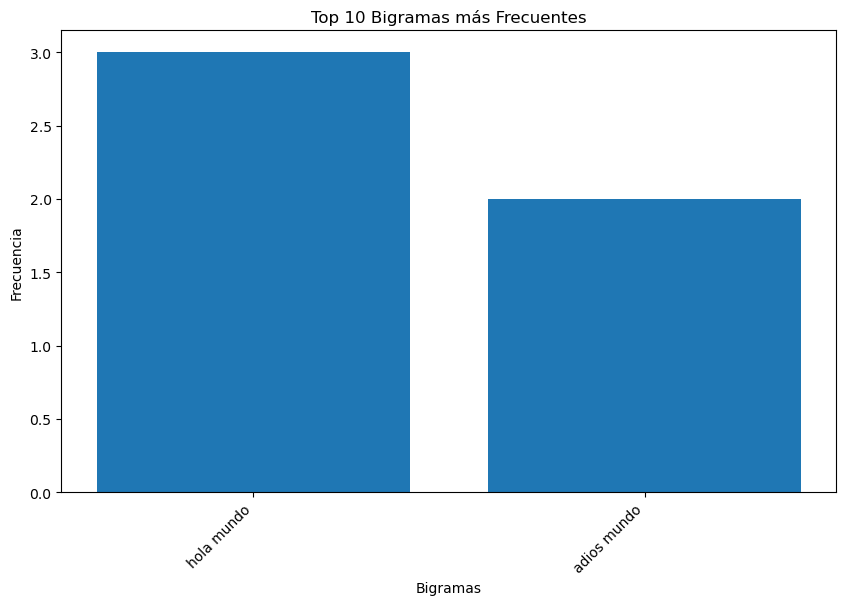

In [15]:
from collections import Counter
import matplotlib.pyplot as plt

def plot_bigramas(skipgramas, top_n=10):
    # Convertir los bigramas a tuplas ordenadas alfabéticamente
    skipgramas_ordenados = [tuple(sorted(bigram)) for bigram in skipgramas]
    
    # Conteo de bigramas
    conteo_bigramas = Counter(skipgramas_ordenados)

    # Obtener los N bigramas más frecuentes
    bigramas_mas_frecuentes = conteo_bigramas.most_common(top_n)

    # Obtener datos para el gráfico
    bigramas_unicos = [bigrama[0] for bigrama in bigramas_mas_frecuentes]
    frecuencias = [frecuencia for _, frecuencia in bigramas_mas_frecuentes]

    # Graficar
    plt.figure(figsize=(10, 6))
    plt.bar(range(len(bigramas_unicos)), frecuencias, tick_label=[f"{bigrama[0]} {bigrama[1]}" for bigrama in bigramas_unicos])
    plt.xticks(rotation=45, ha='right')
    plt.xlabel('Bigramas')
    plt.ylabel('Frecuencia')
    plt.title('Top 10 Bigramas más Frecuentes')
    plt.show()

# Ejemplo de uso
skipgramas = [('hola', 'mundo'), ('mundo', 'hola'), ('hola', 'mundo'), ('mundo', 'adios'), ('adios', 'mundo')]
plot_bigramas(skipgramas)



In [14]:
Generacion_de_skipgramas("hola mundo hola mundo hola mundo xd dou", 2, 0)

[('hola', 'mundo'),
 ('mundo', 'hola'),
 ('hola', 'mundo'),
 ('mundo', 'hola'),
 ('hola', 'mundo'),
 ('mundo', 'xd'),
 ('xd', 'dou')]

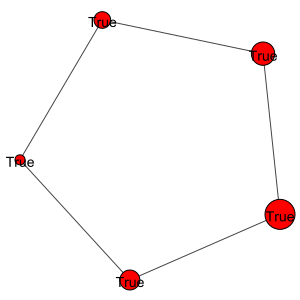

In [39]:
import igraph as ig

# Crear un grafo con pesos en las aristas
grafo = ig.Graph([(0, 1), (1, 2), (2, 3), (3, 4), (4, 0)])
grafo.es['weight'] = [1, 2, 3, 4, 5]  # Asignar pesos arbitrarios a las aristas

# Calcular la suma de los pesos de las aristas para cada nodo
sum_pesos_aristas = grafo.strength(weights='weight')

# Normalizar la suma de los pesos de las aristas para ajustarla al rango de tamaños de los nodos
max_sum_pesos_aristas = max(sum_pesos_aristas)
sizes = [x / max_sum_pesos_aristas * 30 for x in sum_pesos_aristas]  # Ajusta el rango de tamaño deseado

# Asignar el tamaño calculado a los nodos
grafo.vs["size"] = sizes

# Asignar un layout al grafo (en este caso, el layout de Fruchterman-Reingold)
layout = grafo.layout_fruchterman_reingold()

# Dibujar el grafo con el layout de Fruchterman-Reingold y etiquetas de nodos
ig.plot(grafo, layout=layout, vertex_label=True, bbox=(300, 300))


In [1]:
# Definimos una función para calcular el cuadrado de un número
def calcular_cuadrado(numero):
    return numero ** 2

# Creamos una lista de números
numeros = [1, 2, 3, 4, 5]

# Aplicamos la función calcular_cuadrado a cada elemento de la lista usando map()
cuadrados = map(calcular_cuadrado, numeros)

# Convertimos el resultado de map() a una lista
cuadrados_lista = list(cuadrados)

print(cuadrados_lista)

[1, 4, 9, 16, 25]


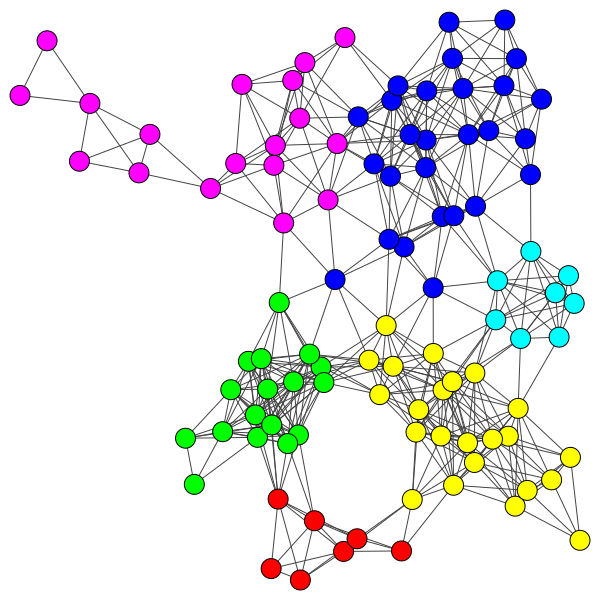

In [7]:
import igraph as ig

# Crear un grafo de ejemplo
g = ig.Graph.GRG(100, 0.2)

# Realizar agrupamiento utilizando el algoritmo de Louvain
clusters = g.community_multilevel()

# Asignar colores a los clusters
palette = ig.RainbowPalette(n=max(clusters.membership) + 1)
colors = [palette.get(int(i)) for i in clusters.membership]

# Dibujar el grafo
layout = g.layout("kk")
ig.plot(g, layout=layout, vertex_color=colors)


In [9]:
import igraph as ig
import random

# Establecer la semilla
random.seed(42)  # Puedes cambiar el valor para obtener diferentes resultados

# Crear un grafo de ejemplo
g = ig.Graph.GRG(10, 0.2)
# asignar nombres a los nodos
g.vs['name'] = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J']

# Realizar agrupamiento utilizando el algoritmo Walktrap
dendrogram = g.community_walktrap()

# Convertir el dendrograma en un objeto VertexClustering
clusters = dendrogram.as_clustering()

# Obtener el índice del clúster mayor y menor
largest_cluster_idx = max(range(len(clusters)), key=lambda i: len(clusters[i]))
smallest_cluster_idx = min(range(len(clusters)), key=lambda i: len(clusters[i]))

# Obtener los nombres de los nodos del clúster mayor
largest_cluster_nodes = [node["name"] for node in g.vs if clusters.membership[node.index] == largest_cluster_idx]

# Obtener los nombres de los nodos del clúster menor
smallest_cluster_nodes = [node["name"] for node in g.vs if clusters.membership[node.index] == smallest_cluster_idx]

print("Nodos del clúster mayor:", largest_cluster_nodes)
print("Nodos del clúster menor:", smallest_cluster_nodes)


Nodos del clúster mayor: ['B', 'D', 'E']
Nodos del clúster menor: ['A']


In [2]:
import pandas as pd

# Datos
data = [[('paramilitares', 103), ('grupo', 78), ('uraba', 72), ('desmovilizacion', 64), ('autodefensas', 63)],
        [('inteligencia', 178), ('informacion', 112), ('partido', 71), ('up', 56), ('ejercito', 55)]]

# Crear listas para almacenar los datos
palabras = []
frecuencias = []

# Iterar sobre los datos y agregarlos a las listas
for lista in data:
    palabras_lista = [par[0] for par in lista]
    frecuencias_lista = [par[1] for par in lista]
    palabras.extend(palabras_lista)
    frecuencias.extend(frecuencias_lista)

# Crear el DataFrame
df = pd.DataFrame({'Palabra': palabras, 'Frecuencia': frecuencias})

# Mostrar el DataFrame
print(df)



           Palabra  Frecuencia
0    paramilitares         103
1            grupo          78
2            uraba          72
3  desmovilizacion          64
4     autodefensas          63
5     inteligencia         178
6      informacion         112
7          partido          71
8               up          56
9         ejercito          55


In [9]:
import pandas as pd

# Lista de listas
listas = [[('paramilitares', 103), ('grupo', 78), ('uraba', 72), ('desmovilizacion', 64), ('autodefensas', 63)],
          [('inteligencia', 178), ('informacion', 112), ('partido', 71), ('up', 56), ('ejercito', 55)]]

# Crear un DataFrame vacío con las columnas apropiadas
df = pd.DataFrame(columns=['palabra 1', 'frecuencia 1', 'palabra 2', 'frecuencia 2', 'palabra 3', 'frecuencia 3', 'palabra 4', 'frecuencia 4', 'palabra 5', 'frecuencia 5'])

# Llenar el DataFrame con los datos de las listas de listas
for i, lista in enumerate(listas):
    for j, tupla in enumerate(lista):
        df.loc[i, f'palabra {j+1}'] = tupla[0]
        df.loc[i, f'frecuencia {j+1}'] = tupla[1]

# Imprimir el DataFrame resultante
print(df)

       palabra 1 frecuencia 1    palabra 2 frecuencia 2 palabra 3  \
0  paramilitares          103        grupo           78     uraba   
1   inteligencia          178  informacion          112   partido   

  frecuencia 3        palabra 4 frecuencia 4     palabra 5 frecuencia 5  
0           72  desmovilizacion           64  autodefensas           63  
1           71               up           56      ejercito           55  


In [4]:
from igraph import Graph

# Creamos un grafo de ejemplo
grafo = Graph.Erdos_Renyi(n=10, m=20)

# Encontramos los puntos de articulación
puntos_articulacion = grafo.articulation_points()

# Calculamos el grado de cada punto de articulación
grados = [grafo.degree(v) for v in puntos_articulacion]

# Encontramos el punto de articulación más importante (el de mayor grado)
indice_max_grado = grados.index(max(grados))
punto_articulacion_importante = puntos_articulacion[indice_max_grado]

print("Nombre del punto de articulación más importante:", punto_articulacion_importante)


Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "c:\Users\bcriv\miniconda3\envs\semillero\Lib\site-packages\IPython\core\interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\bcriv\AppData\Local\Temp\ipykernel_19860\3997569666.py", line 13, in <module>
    indice_max_grado = grados.index(max(grados))
                                    ^^^^^^^^^^^
ValueError: max() arg is an empty sequence

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "c:\Users\bcriv\miniconda3\envs\semillero\Lib\site-packages\IPython\core\interactiveshell.py", line 2144, in showtraceback
    stb = self.InteractiveTB.structured_traceback(
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\bcriv\miniconda3\envs\semillero\Lib\site-packages\IPython\core\ultratb.py", line 1435, in structured_traceback
    return FormattedTB.structured_traceback(
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^